In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdDetermineBonds import DetermineBonds
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.drawOptions.centreMoleculesBeforeDrawing = True
IPythonConsole.molSize = 1000,500

In [60]:
def findNNDihedral(mol):
    for bond in mol.GetBonds():  #Find the correct Bond between two N=N
        if bond.GetBeginAtom().GetSymbol() == "N" and bond.GetEndAtom().GetSymbol() == "N":
            break
        
    N1 = bond.GetBeginAtom()
    N2 = bond.GetEndAtom()
    atomsIndex = [N1.GetIdx()]  #Save the Index of the first N
    
    for atom in N1.GetNeighbors():  #Check the neighbors of the first N and save the Index of the bonded atom.
        if atom.GetSymbol() != "N":
            atomsIndex.insert(0, atom.GetIdx())
        if atom.GetSymbol() == "N":
            atomsIndex.insert(2, atom.GetIdx())

    for atom in N2.GetNeighbors():  # Find the index of the last non N-atom
        if atom.GetSymbol() != "N":
            atomsIndex.insert(3, atom.GetIdx())
            
    return atomsIndex

In [64]:

start_mol = Chem.MolFromXYZFile("start.xyz")
DetermineBonds(start_mol,charge = 0)
AllChem.Compute2DCoords(start_mol)


print(findNNDihedral(start_mol))

[23, 10, 11, 12]


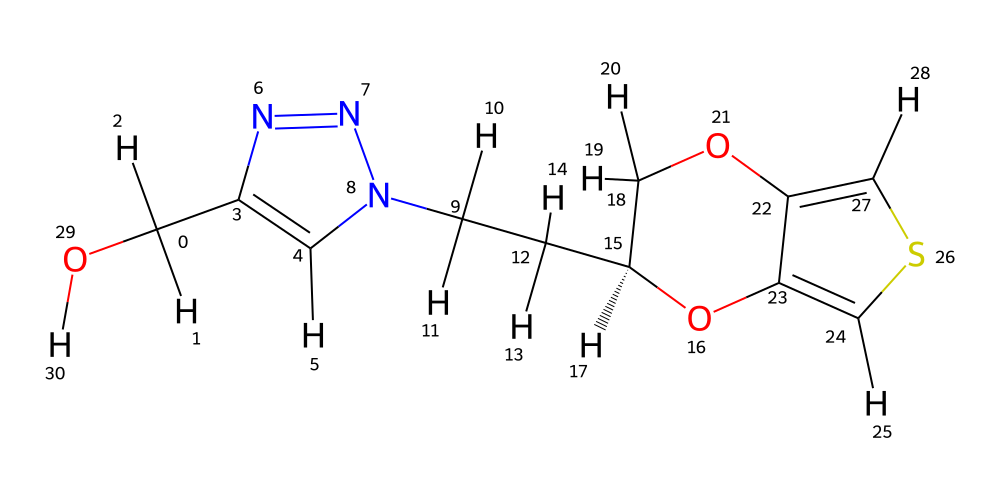

In [63]:
start_mol